In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [8]:
#reading the dataset
df = pd.read_csv('/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')

#printing the dataset
df.describe
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [9]:
#dropping irrelevant column of Loan_ID 
df = df.drop('Loan_ID', axis=1)

In [10]:
#checking which columns have how many nulll values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Imputation

In [11]:
#dropping null values in Credit History
column_to_drop_nulls = 'Credit_History' 
df.dropna(subset=[column_to_drop_nulls], inplace=True)

df['Credit_History']=df['Credit_History'].astype(str) #converting Credit History into object type

#filling null values in categorical columns with most frequent(mode) occurances in that column
columns_to_impute = ['Gender','Married','Dependents','Self_Employed','Credit_History'] 
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns_to_impute = [col for col in columns_to_impute if col in categorical_columns]
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns_to_impute] = categorical_imputer.fit_transform(df[categorical_columns_to_impute])

#filling null values in numerical columns with the mean of occurances in that column
col2 = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
categorical_columns = df.select_dtypes(include=['float64']).columns
categorical_columns_to_impute = [col for col in col2 if col in categorical_columns]
categorical_imputer = SimpleImputer(strategy='mean')
df[categorical_columns_to_impute] = categorical_imputer.fit_transform(df[categorical_columns_to_impute])

In [12]:
#confirming out cleaning process has worked
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Normalization of numerical columns

In [13]:
#using square root to normalise the numerical columns
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)
df.Loan_Amount_Term = np.sqrt(df.Loan_Amount_Term)

In [14]:
#removing any remaining null values
col1 = 'LoanAmount'
df.dropna(subset=[col1], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             564 non-null    object 
 1   Married            564 non-null    object 
 2   Dependents         564 non-null    object 
 3   Education          564 non-null    object 
 4   Self_Employed      564 non-null    object 
 5   ApplicantIncome    564 non-null    float64
 6   CoapplicantIncome  564 non-null    float64
 7   LoanAmount         564 non-null    float64
 8   Loan_Amount_Term   564 non-null    float64
 9   Credit_History     564 non-null    object 
 10  Property_Area      564 non-null    object 
 11  Loan_Status        564 non-null    object 
dtypes: float64(4), object(8)
memory usage: 57.3+ KB


In [15]:
#checking the dataset
df.head(30)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,76.478755,0.000000,12.045265,18.973666,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,18.973666,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,18.973666,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,18.973666,1.0,Urban,Y
4,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,18.973666,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,73.600272,64.776539,16.340135,18.973666,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,48.301139,38.935845,9.746794,18.973666,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,55.099909,50.039984,12.569805,18.973666,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,63.292970,39.064050,12.961481,18.973666,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,113.318136,104.728220,18.681542,18.973666,1.0,Semiurban,N


Preprocessing categorical data

In [16]:
from sklearn.preprocessing import LabelEncoder
# Select categorical columns for label encoding
categorical_cols = ['Gender', 'Married', 'Education', 'Property_Area','Self_Employed','Loan_Status']

# Apply label encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Ensure dataset is ready for modeling convert string values in dependents to int
df['Dependents'] = df['Dependents'].replace('3+', '3')

In [17]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,76.478755,0.000000,12.045265,18.973666,1.0,2,1
1,1,1,1,0,0,67.697858,38.832976,11.313708,18.973666,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,18.973666,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,10.954451,18.973666,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,11.874342,18.973666,1.0,2,1


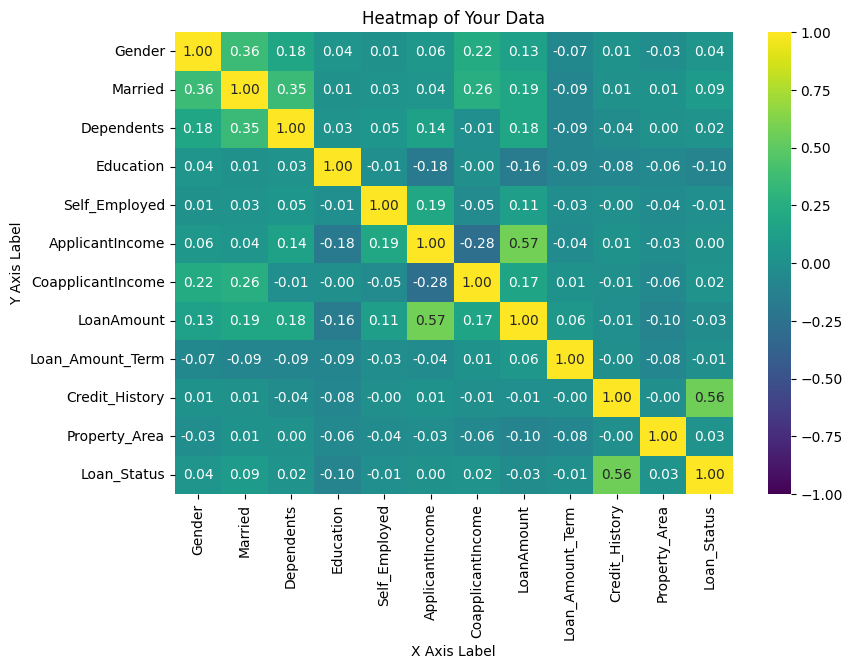

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap of Your Data')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
#Using logistic regression with the most dependant variable
X = df[['Credit_History']]
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(solver='saga', max_iter=500, random_state=1)

#fitting the model
model.fit(X_train, y_train)

#predicting
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:", cm)

Accuracy: 0.8053097345132744
Precision: 0.7857142857142857
Recall: 0.9871794871794872
F1-score: 0.8750000000000001
Confusion Matrix: [[14 21]
 [ 1 77]]


In [20]:
#Using logistic regression with top 2 dependant variables
X = df[['Credit_History','Married']]
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(solver='saga', max_iter=500, random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:", cm)

Accuracy: 0.8584070796460177
Precision: 0.8333333333333334
Recall: 1.0
F1-score: 0.9090909090909091
Confusion Matrix: [[17 16]
 [ 0 80]]


In [21]:
#Using logistic regression with top 5 dependant variables
X = df[['Credit_History','Married','Self_Employed','Dependents','Property_Area']]
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(solver='saga', max_iter=500, random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:", cm)

Accuracy: 0.8407079646017699
Precision: 0.8279569892473119
Recall: 0.9746835443037974
F1-score: 0.8953488372093023
Confusion Matrix: [[18 16]
 [ 2 77]]


In [22]:
X = df.drop('Loan_Status', axis=1)  # Independant variables
y = df['Loan_Status']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

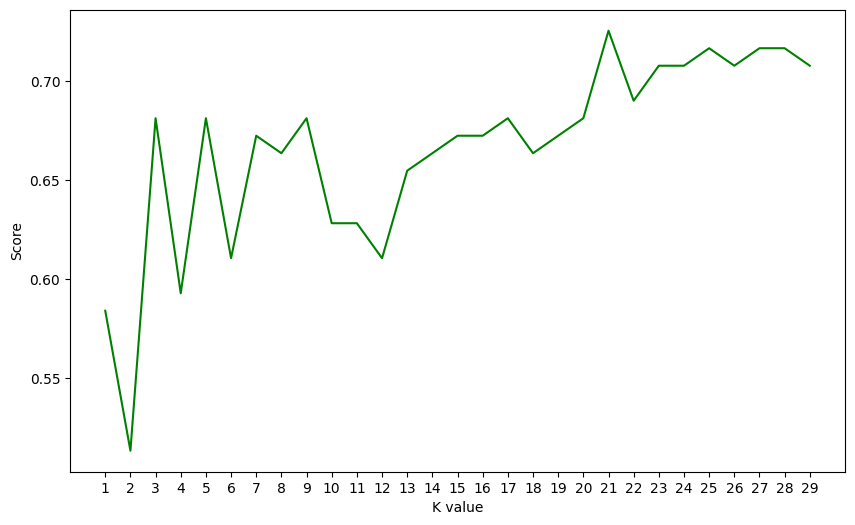

KNN best accuracy: 72.57%


In [23]:
#Checking which K value gives maximum accuracy
from sklearn.neighbors import KNeighborsClassifier
kval = []
num = 30
for i in range(1,num):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    kval.append(KNclassifier.score(X_test, y_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,num), kval, color = 'green')
plt.xticks(np.arange(1,num,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(kval)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [24]:
#Predicting using k value = 27
KNclassifier = KNeighborsClassifier(n_neighbors = 27)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:", cm)

Accuracy: 0.7168141592920354
Precision: 0.7142857142857143
Recall: 1.0
F1-score: 0.8333333333333333
Confusion Matrix: [[ 1 32]
 [ 0 80]]


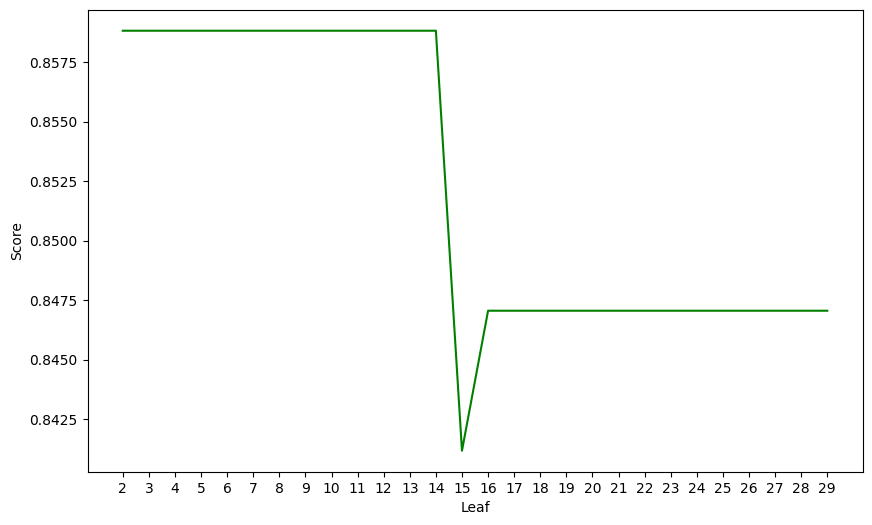

Decision Tree Accuracy: 85.88%


In [25]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
X = df[['Credit_History','Married','Self_Employed','Dependents','Property_Area']]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

#checking which leaves give maximum accuracy
num = 30
accList = []
for i in range(2,num):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    accList.append(DTclassifier.score(X_test, y_test))
    
plt.figure(figsize = (10,6))
plt.plot(range(2,num), accList, color = 'green')
plt.xticks(np.arange(2,num,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(accList)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [26]:
#predicting on depth = 2 as it is gives highest accuracy
decision_tree_model = DecisionTreeClassifier(max_depth=2)
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:", cm)

Accuracy: 0.8588235294117647
Precision: 0.8531468531468531
Recall: 0.976
F1-score: 0.9104477611940298
Confusion Matrix: [[ 24  21]
 [  3 122]]


In [27]:
# #Naive Bayes
# from sklearn.naive_bayes import MultinomialNB

# X = df['ApplicantIncome']
# y = df.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# NBM_model = MultinomialNB()
# NBM_model.fit(X_train.values.reshape(-1, 1), y_train)

# # Make predictions on the testing set
# y_pred = NBM_model.predict(X_test.values.reshape(-1, 1))

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)
# print("Confusion Matrix:", cm)

In [28]:
#Cross validating in order to maintain consisten class proportions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
X = df[['Credit_History','Married']]
y = df.iloc[:, -1]

models = {
    'Logistic Regression': LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'RandomForest' : RandomForestClassifier()
}


# Perform cross-validation
cv = StratifiedKFold(n_splits=2, shuffle=True)  # Stratified K-Fold for classification
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f'{name}: Mean Accuracy - {scores.mean():.4f}, Std Dev - {scores.std():.4f}')

Logistic Regression: Mean Accuracy - 0.8156, Std Dev - 0.0035
KNN: Mean Accuracy - 0.7305, Std Dev - 0.0922
Decision Tree: Mean Accuracy - 0.8156, Std Dev - 0.0071
RandomForest: Mean Accuracy - 0.8156, Std Dev - 0.0071


In [29]:
#Random Forest checking which number of leaf nodes gives maximum accuracy
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

num = 20
RFAcc = []
for i in range(2,num):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    RFAcc.append(RFclassifier.score(X_test, y_test))

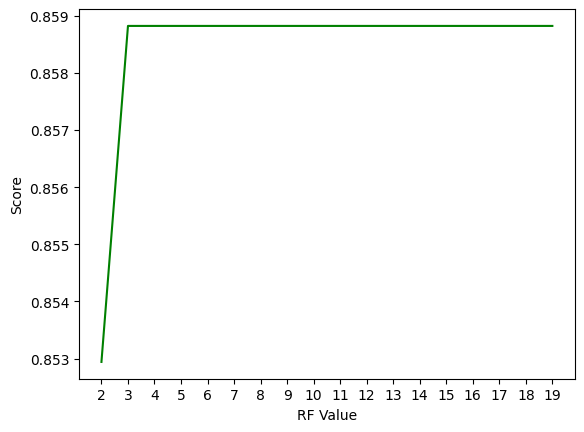

Random Forest Accuracy:  85.88%


In [30]:
plt.plot(range(2,num), RFAcc, color = 'green')
plt.xticks(np.arange(2,num,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
maxval = max(RFAcc)
print("Random Forest Accuracy:  {:.2f}%".format(maxval*100))

In [31]:
#predicting using max leaf nodes as 3 as it gives maximum accuracy
RFmodel = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=3)
RFmodel.fit(X_train, y_train)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:", cm)

Accuracy: 0.8588235294117647
Precision: 0.8531468531468531
Recall: 0.976
F1-score: 0.9104477611940298
Confusion Matrix: [[ 24  21]
 [  3 122]]


In [ ]:
#taking input from the user and predicting using the model with the highest accuracy

#Preprocessing user inputs
def preprocess_input(input_dict):
    df = pd.DataFrame(input_dict, index=[0])

    # Label encode categorical variables
    categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
    label_encoders = {}
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

    df['Dependents'] = df['Dependents'].replace('3+', 3)  # Replace '3+' with 3

    return df

# Load the trained model
decision_tree_model = DecisionTreeClassifier()

# Define a function to train the model
def train_model(X_train, y_train):
    decision_tree_model.fit(X_train, y_train)

# Define a function to predict loan status
def predict_loan_status(input_dict):
    input_df = preprocess_input(input_dict)
    loan_status = decision_tree_model.predict(input_df)
    return loan_status[0]

# Assuming you have training data X_train and corresponding labels y_train
# Train the model
train_model(X_train, y_train)

# Input values from the user
input_values = {
    'Gender': input("Enter Gender (Male/Female): "),
    'Married': input("Enter Marital Status (Yes/No): "),
    'Dependents': input("Enter Number of Dependents (0/1/2/3+): "),
    'Education': input("Enter Education (Graduate/Non Graduate): "),
    'Self_Employed': input("Enter Self Employed (Yes/No): "),
    'ApplicantIncome': float(input("Enter Applicant Income: ")),
    'CoapplicantIncome': float(input("Enter Coapplicant Income: ")),
    'LoanAmount': float(input("Enter Loan Amount: ")),
    'Loan_Amount_Term': float(input("Enter Loan Amount Term: ")),
    'Credit_History': float(input("Enter Credit History (1/0): ")),
    'Property_Area': input("Enter Property Area (Urban/Rural/Semiurban): ")
}

# Predict loan status
predicted_loan_status = predict_loan_status(input_values)

# Display the predicted loan status
if(predicted_loan_status == 1):
    print("Applicant is eligible for a loan")
else:
    print("Applicant is not eligible for a loan")
